<a href="https://colab.research.google.com/github/jha-vineet69/Minimizing-Churn-Rate/blob/main/Minimizing_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import RFE

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/jha-vineet69/Minimizing-Churn-Rate/main/churn_data.csv') # Users who were 60 days enrolled, churn in the next 30

### EDA

In [3]:
dataset.head(10) # Viewing the Data

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0
5,3120,1,32.0,R,567.0,5,3,111,5,0,227,0,0,17,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Taurus,0,0,55.0,1.83,0
6,41406,0,21.0,na,475.0,0,0,4,0,0,0,0,0,0,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Cancer,0,0,2.0,0.07,0
7,67679,0,24.0,na,NaN,0,0,2,0,0,0,0,0,0,1,0,0,0,1,0,na,0,0,0,0,Leo,0,0,1.0,0.11,0
8,21269,0,28.0,R,548.0,0,0,0,0,2,47,1,0,9,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Sagittarius,0,0,26.0,0.87,1
9,25788,0,23.0,na,658.0,1,0,87,1,0,125,0,0,3,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Aquarius,0,0,32.0,1.07,0


In [4]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [5]:
dataset.describe().T # Distribution of Numerical Variables

,count,mean,std,min,25%,50%,75%,max
user,27000.0,35422.702519,20321.006678,1.0,17810.5,35749.00,53244.25,69658.0
churn,27000.0,0.413852,0.492532,0.0,0.0,0.00,1.00,1.0
age,26996.0,32.219921,9.964838,17.0,25.0,30.00,37.00,91.0
credit_score,18969.0,542.944225,61.059315,2.0,507.0,542.00,578.00,838.0
deposits,27000.0,3.341556,9.131406,0.0,0.0,0.00,1.00,65.0
withdrawal,27000.0,0.307000,1.055416,0.0,0.0,0.00,0.00,29.0
purchases_partners,27000.0,28.062519,42.219686,0.0,0.0,9.00,43.00,1067.0
purchases,27000.0,3.273481,8.953077,0.0,0.0,0.00,1.00,63.0
cc_taken,27000.0,0.073778,0.437299,0.0,0.0,0.00,0.00,29.0
cc_recommended,27000.0,92.625778,88.869343,0.0,10.0,65.00,164.00,522.0


In [6]:
dataset[dataset.credit_score < 300]

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
7347,45685,1,22.0,na,3.0,0,0,16,0,0,42,0,0,0,1,1,1,0,1,0,na,0,0,0,0,na,0,0,16.0,0.53,0
9244,33603,0,28.0,na,2.0,0,0,5,0,0,6,0,0,0,1,1,1,0,1,0,Weekly,0,0,0,0,Aquarius,0,0,1.0,0.04,0
11978,2465,0,32.0,R,3.0,42,5,56,42,0,209,0,0,41,1,1,1,1,1,3,Bi-Weekly,0,0,0,0,Libra,0,0,24.0,0.80,1
18857,33700,1,22.0,na,2.0,0,0,0,0,0,21,0,0,2,1,0,0,1,0,0,Bi-Weekly,0,0,0,0,Gemini,0,0,6.0,0.20,0


In [7]:
dataset = dataset[~(dataset['credit_score'] < 300)]  

In [8]:
dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [9]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [10]:
dataset2 = dataset.drop(columns = ['credit_score', 'rewards_earned'])

In [11]:
my_color = ['#287271', '#EE8959', '#8AB17D', '#E9C46A', '#564787', '#219ebc', '#d90429']

In [12]:
dataset3 = dataset2.drop(columns = ['user', 'churn'])

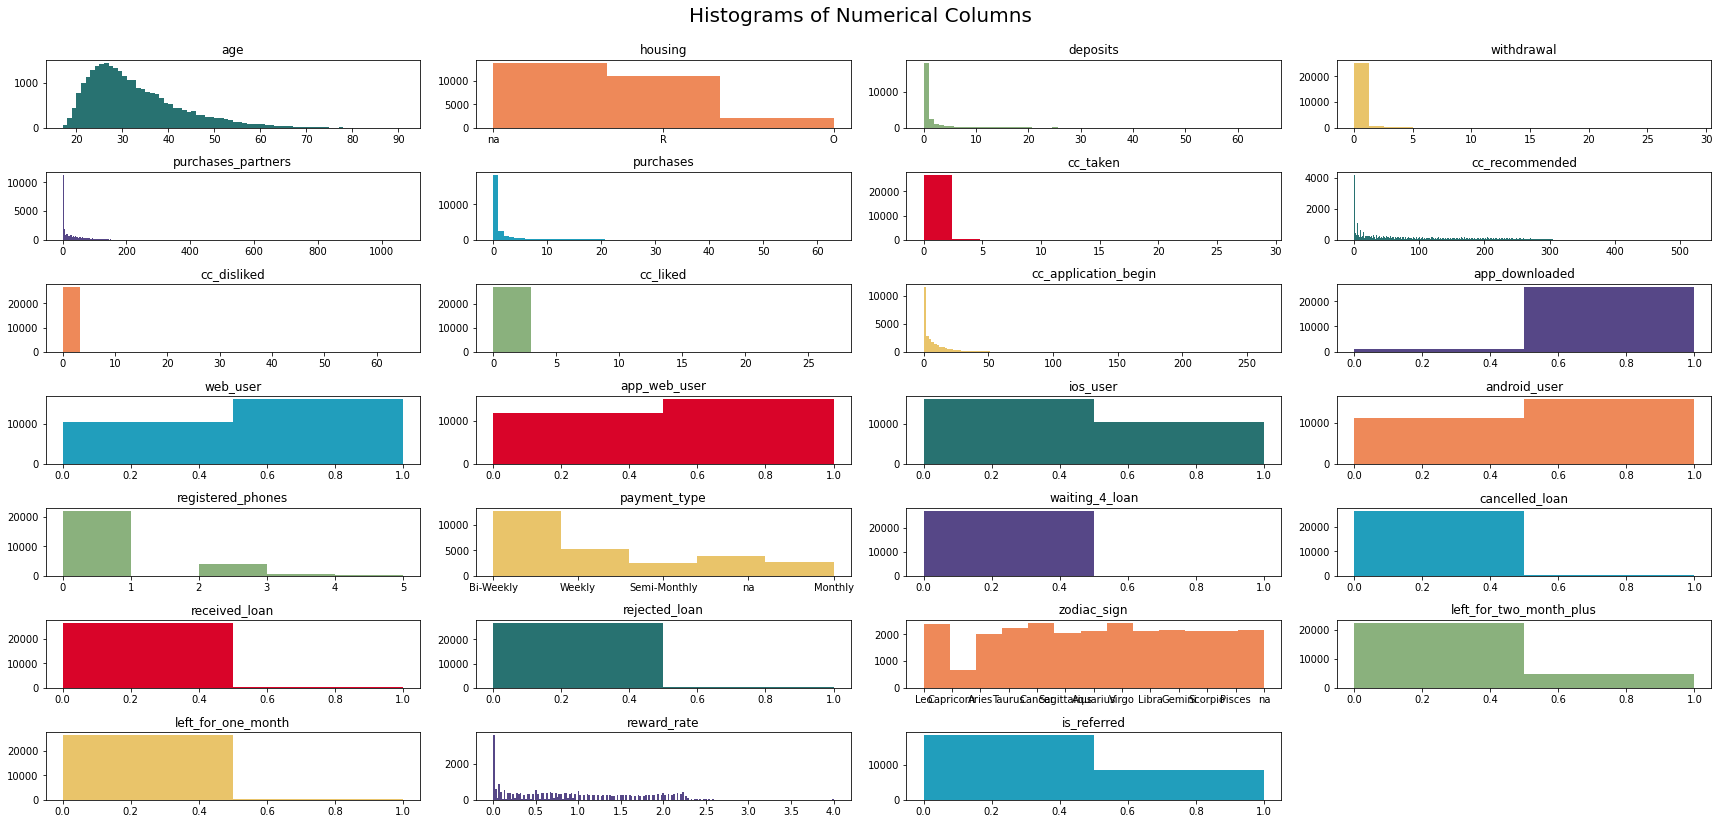

In [13]:
## Histograms
fig = plt.figure(figsize=(24, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset3.shape[1] + 1):
    plt.subplot(7, 4, i)
    f = plt.gca()
    f.set_title(dataset3.columns.values[i - 1])

    vals = np.size(dataset3.iloc[:, i - 1].unique())
    
    plt.hist(dataset3.iloc[:, i - 1], bins=vals, color=my_color[(i-1)%7])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('churn_rate_hist.jpg')

In [14]:
dataset4 = dataset3[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

In [15]:
my_color2 = ['#287271', '#EE8959', '#8AB17D', '#E9C46A', '#564787', '#219ebc', '#d90429', '#c2c2f0', '#ffb3e6', '#2ec4b6', '#e27396', '#aaf683', '#ef476f']

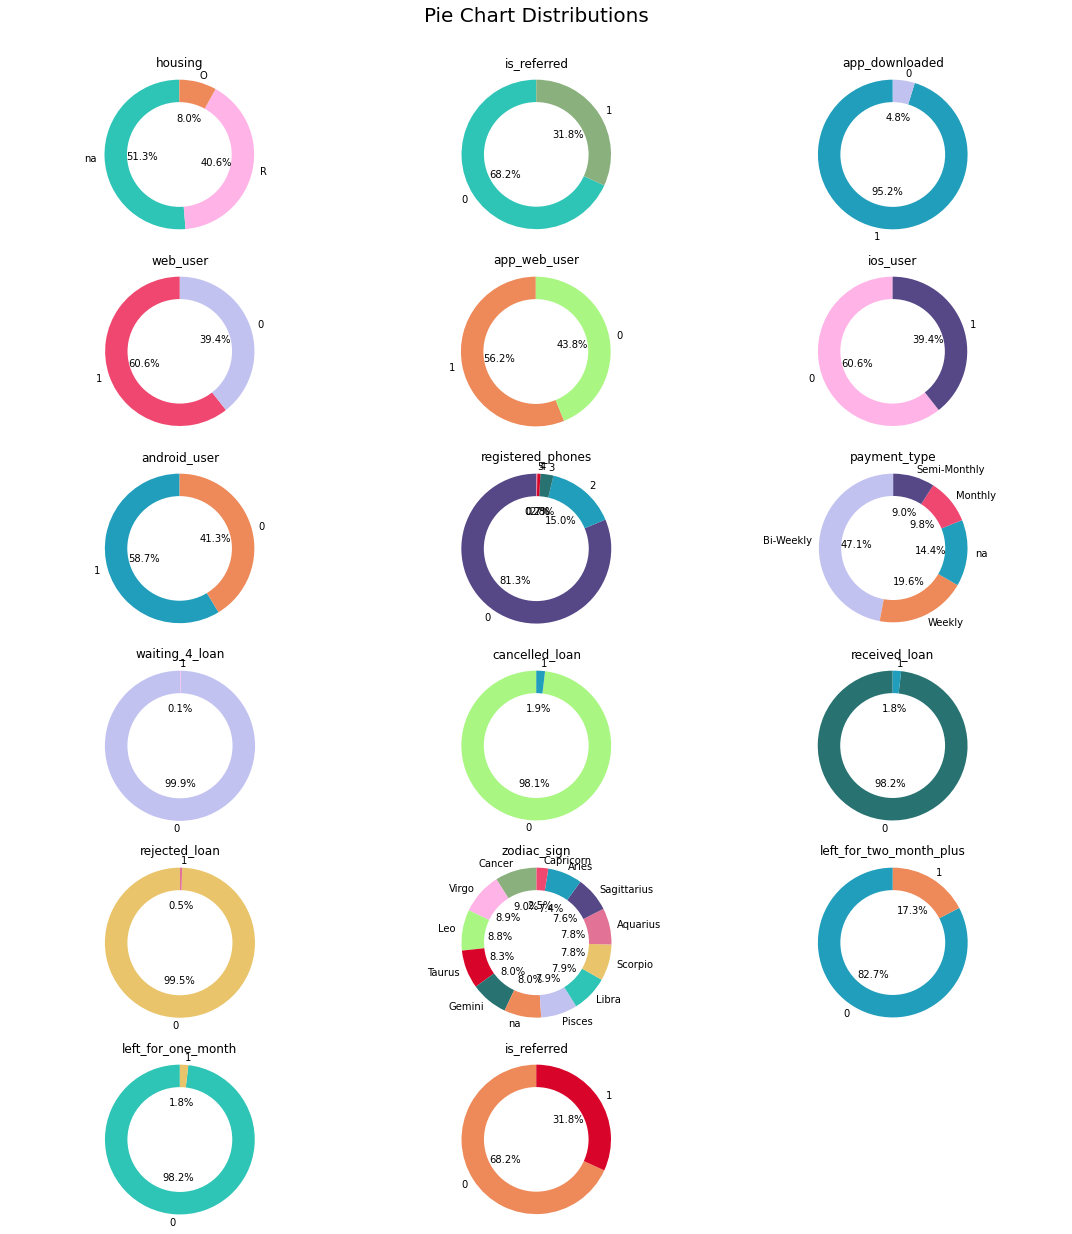

In [16]:
## Pie Plots
fig = plt.figure(figsize=(15, 18))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset4.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset4.columns.values[i - 1])
   
    values = dataset4.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset4.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%', startangle=90, pctdistance=0.5, colors = random.sample(my_color2, len(index)))
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])